<a href="https://colab.research.google.com/github/sidharth-ds/Energy-efficiency-of-buildings-project/blob/main/Residential_building_Energy_Efficiency_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing necessary packages:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import cross_val_score
from sklearn import metrics

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [ ]:
# load dataset
dataframe = pd.read_csv("/content/energy eff.csv")
dataframe

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


Attributes information:
* X1 Relative Compactness
* X2 Surface Area
* X3 Wall Area
* X4 Roof Area
* X5 Overall Height
* X6 Orientation
* X7 Glazing Area
* X8 Glazing Area Distribution
* y1 Heating Load - Target
* y2 Cooling Load - Target

In [ ]:
# Assign names to Columns:
dataframe.columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height', 'orientation', 'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']

## EDA (numerical):

In [ ]:
dataframe.describe()  # statistical EDA

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [ ]:
dataframe.info()    # EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative_compactness       768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   overall_height             768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   heating_load               768 non-null    float64
 9   cooling_load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
dataframe.isna().sum()   # checking for null values

relative_compactness         0
surface_area                 0
wall_area                    0
roof_area                    0
overall_height               0
orientation                  0
glazing_area                 0
glazing_area_distribution    0
heating_load                 0
cooling_load                 0
dtype: int64

In [ ]:
dataframe.corr(method='pearson').round(1)      # checking Linear Correlation between Features & Target

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
relative_compactness,1.0,-1.0,-0.2,-0.9,0.8,0.0,-0.0,-0.0,0.6,0.6
surface_area,-1.0,1.0,0.2,0.9,-0.9,-0.0,0.0,0.0,-0.7,-0.7
wall_area,-0.2,0.2,1.0,-0.3,0.3,-0.0,-0.0,0.0,0.5,0.4
roof_area,-0.9,0.9,-0.3,1.0,-1.0,-0.0,-0.0,-0.0,-0.9,-0.9
overall_height,0.8,-0.9,0.3,-1.0,1.0,0.0,0.0,-0.0,0.9,0.9
orientation,0.0,-0.0,-0.0,-0.0,0.0,1.0,-0.0,-0.0,-0.0,0.0
glazing_area,-0.0,0.0,-0.0,-0.0,0.0,-0.0,1.0,0.2,0.3,0.2
glazing_area_distribution,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.2,1.0,0.1,0.1
heating_load,0.6,-0.7,0.5,-0.9,0.9,-0.0,0.3,0.1,1.0,1.0
cooling_load,0.6,-0.7,0.4,-0.9,0.9,0.0,0.2,0.1,1.0,1.0


***INTERPRETATION:***
* **overall_height** has the highest correlation with **heating_load** and **cooling_load** (which is a positive correlation), 
* **roof_area** for both outputs which is a negative correlation, 
* **orientation** has the least correlation 

## Splitting Features & Target:

In [ ]:
# Data preparation:
dataset = dataframe.values

X = dataset[:,0:8]
Y1 = dataset[:,8]
Y2 = dataset[:,9]

## EDA (Visual):

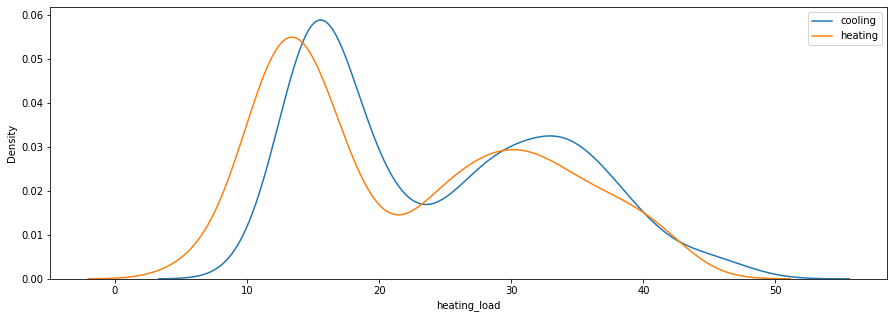

In [ ]:
# Target variables:

plt.figure(figsize=(15,5))
sns.distplot(dataframe['cooling_load'],hist=False, label='cooling')
sns.distplot(dataframe['heating_load'],hist=False, label='heating')
plt.legend()
plt.show()

***INTERPRETATION:***

* Most of the dataset's samples fall between 10 and 20 of both 'heating_load' and 'cooling_load' regressional output classes.
* follows Bimodal distribution with a positive skew.

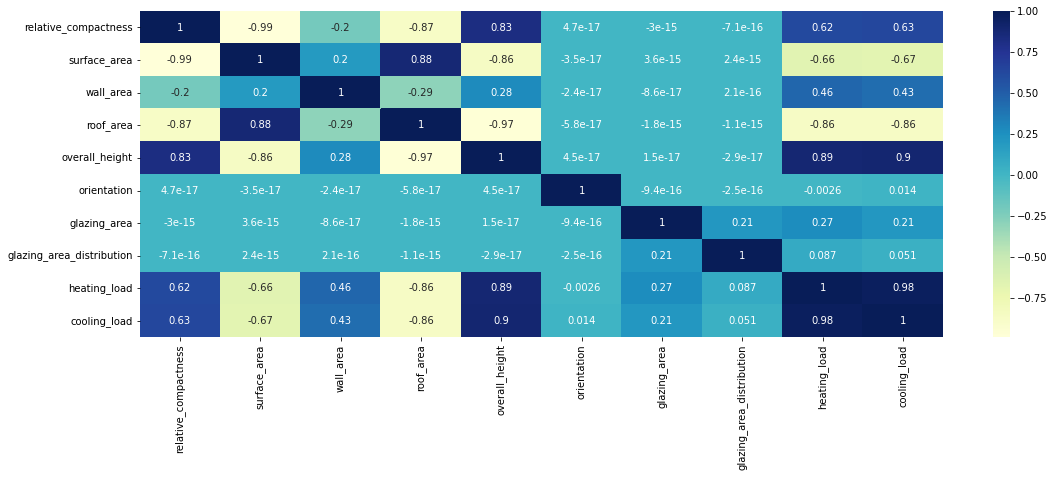

In [ ]:
# features correlation:

plt.figure(figsize=(18,6))
sns.heatmap(dataframe.corr(), cmap="YlGnBu", annot=True)
plt.show()

***INTERPRETATION:***
* We can see that some features are positively correlated (overall_height, relative_compactness)
* some are negatively correlated (roof_area, surface_area)
* some have no Linear correlation (orientation, glazing area)

## Feature selection: (Repeated Feature Elimination)

In [ ]:
# Feature Selection for Y1
model = RandomForestRegressor()
rfe = RFE(model)
fit = rfe.fit(X, Y1)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_) 

for feature in fit.support_.nonzero():
  print(dataframe.columns[feature])

Number of Features:  4
Selected Features:  [ True  True False  True False False  True False]
Feature Ranking:  [1 1 3 1 2 5 1 4]
Index(['relative_compactness', 'surface_area', 'roof_area', 'glazing_area'], dtype='object')


top 4 selected features/feature combination for predicting **heating_load** using Recursive Feature Elimination:
* relative_compactness
* surface_area
* roof_area
* overall_height 

In [ ]:
# Feature Selection for Y2
model = RandomForestRegressor()
rfe = RFE(model)
fit = rfe.fit(X, Y2)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_) 

for feature in fit.support_.nonzero():
  print(dataframe.columns[feature])

Number of Features:  4
Selected Features:  [ True  True False False  True False  True False]
Feature Ranking:  [1 1 3 2 1 5 1 4]
Index(['relative_compactness', 'surface_area', 'overall_height',
       'glazing_area'],
      dtype='object')


top 4 selected features/feature combination for predicting **cooling_load**
using Recursive Feature Elimination:
* relative_compactness 
* surface_area
* overall_height
* glazing_area

## Modelling Y1 (Heating load):

In [ ]:
num_instances = len(X)

models = []
models.append(('Linear reg', LinearRegression()))
models.append(('Ridge reg', Ridge()))
models.append(('Lasso reg', Lasso()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('KNN reg', KNeighborsRegressor()))
models.append(('Decision tree', DecisionTreeRegressor()))

# Evaluations
results = []
names = []

for name, model in models:
    # Fit the model
    model.fit(X, Y1)
    
    # Predict
    predictions = model.predict(X)
    
    # Evaluate the model
    cv_results = cross_val_score(model, X, Y1, cv=10, scoring = "r2")
    results.append(cv_results)
    names.append(name)
    msg = "%s:        CV-SCORE=%.2f       (std=%.2f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Linear reg:        CV-SCORE=0.89       (std=0.07)
Ridge reg:        CV-SCORE=0.89       (std=0.07)
Lasso reg:        CV-SCORE=0.74       (std=0.19)
RandomForest:        CV-SCORE=0.97       (std=0.08)
KNN reg:        CV-SCORE=0.88       (std=0.19)
Decision tree:        CV-SCORE=0.97       (std=0.08)


[Text(0, 0, 'Linear reg'),
 Text(0, 0, 'Ridge reg'),
 Text(0, 0, 'Lasso reg'),
 Text(0, 0, 'RandomForest'),
 Text(0, 0, 'KNN reg'),
 Text(0, 0, 'Decision tree')]

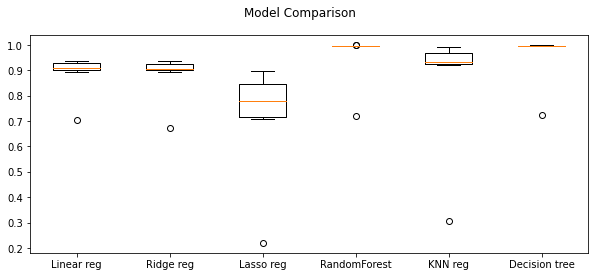

In [ ]:
# boxplot for model Comparison:

fig = plt.figure(figsize=(10,4))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

***INTERPRETATION:***
The best models for **heating_load**:
  * 'Decision Tree Regressor' (97%) and 
  * 'Random Forest' (97%)
 

## Modelling Y2 (Cooling load):

In [ ]:
# Evaluations
results = []
names = []

for name, model in models:
    # Fit the model
    model.fit(X, Y2)
    
    # Predictions
    predictions = model.predict(X)
    
    # Evaluate the model
    cv_results = cross_val_score(model, X, Y2, cv=10, scoring = "r2")
    results.append(cv_results)
    names.append(name)
    msg = "%s:        CV-SCORE=%.2f       (std=%.2f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Linear reg:        CV-SCORE=0.88       (std=0.03)
Ridge reg:        CV-SCORE=0.87       (std=0.04)
Lasso reg:        CV-SCORE=0.75       (std=0.10)
RandomForest:        CV-SCORE=0.97       (std=0.02)
KNN reg:        CV-SCORE=0.92       (std=0.09)
Decision tree:        CV-SCORE=0.96       (std=0.02)


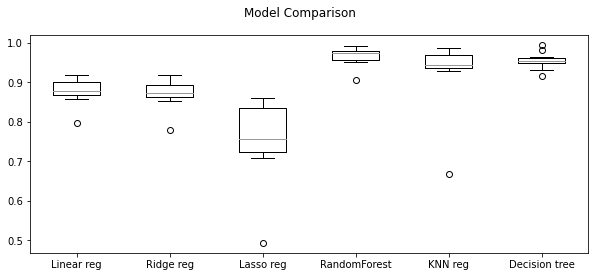

In [ ]:
# boxplot for model Comparison:

fig = plt.figure(figsize=(10,4))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

***INTERPRETATION:***
The best estimators/models for **cooling_load**:
  * 'Random Forest Regressor' (97%)
  * 'Decision Tree Regressor'  (96%)
  * as well as 'KNN regressor' (92%)